In [1]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
register_matplotlib_converters()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
sns.reset_orig
def test_inds(dataset, dates=[], plot=True, figsize=(20,4)):
    # Return indexes for given dates list (dates in tuples)
    import datetime
    if len(dates):
        # Read all sensor features for given Dataset
        dataset.get_sensor_features();
        # Create dataframe with date column
        df = dataset.df_features[['filenames','datestr']]
        if plot:
            # Make a histogram that shows counts for each day/month combination
            df.groupby('datestr').count().plot(kind="bar", figsize=figsize)
        # Count and collect signals for specified dates 
        lst = []
        for dt, sub in df.groupby("datestr"):
            if dt in dates:
                lst = lst + sub.index.tolist()
    print("{} test data.".format(len(lst)))
    return np.array(lst)

def test_days(dataset):
    dataset.get_sensor_features();
    df = dataset.df_features
    total = df.shape[0]
    day_counts = []
    daystrings = []
    for dt, sub in df.groupby('datestr'):
        day_counts.append(sub.shape[0])
        daystrings.append(dt)

    series = pd.Series(day_counts)

    for w in range(len(day_counts)):
        z = series.rolling(window=w).sum().apply(lambda x: x> 0.1*total)
        last_ind = z.last_valid_index()
        if z[w]:
            break
    early_days = daystrings[0:w]

    for w in range(len(day_counts)):
        z = series.rolling(window=w).sum().apply(lambda x: x> 0.1*total)
        last_ind = z.last_valid_index()
        if z[last_ind]:
            break
    late_days = daystrings[last_ind-w : last_ind]
    
    return early_days, late_days

Data: P_Cichorii.
Read 1600 filenames in 0.09 seconds.
Loaded data into matrix in 0.57 seconds.
1075 filenames after cleaning.
115 test data.


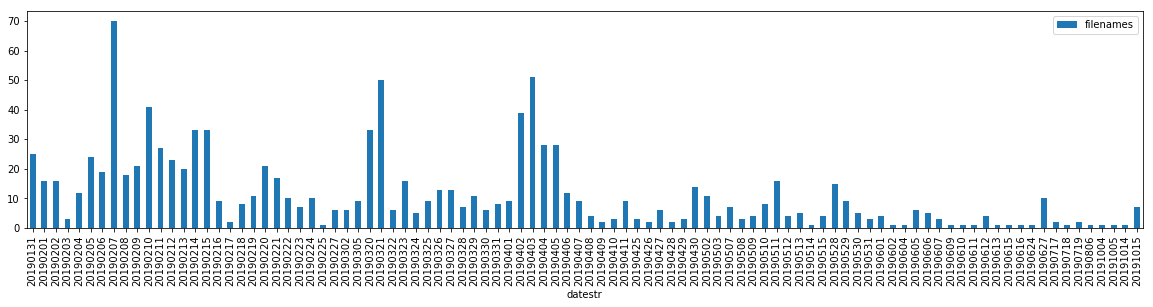

In [3]:
data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB')
data1.clean(threshold=10, plot=False)
dates = test_days(data1)[0]
inds_1 = test_inds(data1, dates=dates)

In [203]:
data1 = Dataset('Leafminers')
data1.read(data=data1.target_classes[0], setting='psd_dB')
data1.clean(threshold=10, plot=False)
dates = test_days(data1)[0]
inds_1 = test_inds(data1, dates=dates)

'(2019,01,31)'